## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 3 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

    
    
**Submission date: 9.2.24** \
Note: In case you need an extension for any reason, you can submit it by 14.2.24. \
No extra extensions will be given.
In case you are in miluim - please contact Yael directly.

**Your name: [klil Halahmi, Lihi Bik]**
**Your ID: [206141418, 301850517]**

In this exercise, you will practice projection matrices and epipolar geometry related tasks.



## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex3.ipynb
   - images you use that were not given 
2. You should use Jupyter Notebook.
3. Name the zip file **'ex3_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. 
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.



In [1]:
import cv2

# This opens an inteactive figure - use it in part B
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.9.6
Numpy version:  1.26.4


## <span style="color:blue">Section A: Projection

In this part you will go over projection matrix,  and use them to project 3D points to an image.



## <span style="color:blue">Part A1: Projection Matrix 
Fill the missing values, given partial values of the parameters of the left and right cameras.




**Right image parameters:**
The projection matrix of the right image:

In [3]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [4]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [5]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [6]:
OxR = MR[0,2]
OyR = MR[1,2]

print(f'OxR = {OxR}, OxR = {OxR}')

OxR = 331.023, OxR = 331.023


Compute the right image scale factor which is consistent with MR:

In [7]:
SxR = MR[0,0] / fR
SyR = MR[1,1] / fR

print(f'SxR = {SxR}, SyR = {SyR}')

SxR = 1100.50478, SyR = 1097.763735


Compute the right image intrinsic matrix which is consistent with MR:

In [8]:
MintR = MR

print(f'MintR:\n {MintR}')

MintR:
 [[1.10050478e+03 0.00000000e+00 3.31023000e+02 0.00000000e+00]
 [0.00000000e+00 1.09776373e+03 2.59386377e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]


 
**Left image parameters**
 
Left image center (principal point):

In [9]:
OxL = 320.798101 
OyL = 236.431326

Scale factor:

In [10]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [11]:
fL = 1

Translation vector w.r.t. the world origin:

In [12]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [13]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera: 

In [14]:
MintL = np.array([[ SxL * fL,    0,         OxL, 0],
                  [0,           SyL * fL,   OyL, 0],
                  [0,           0,          1,   0]])

print(f'MintL:\n {MintL}')

MintL:
 [[1.09567150e+03 0.00000000e+00 3.20798101e+02 0.00000000e+00]
 [0.00000000e+00 1.09455958e+03 2.36431326e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]


Compute the projection matrix of the left camera

In [15]:
RT = np.dot(RL, TL)

MextL = np.zeros([4,4])
MextL[3,3] = 1
MextL[0, 3], MextL[1, 3], MextL[2, 3] = -RT[0], -RT[1], -RT[2]
MextL[:-1,:-1] = RL

ML = np.dot(MintL, MextL) 

print(f'ML:\n {ML}' )

ML:
 [[ 1.12706850e+03  6.42591943e+01  1.70369375e+02  1.99730613e+05]
 [-3.26371433e+01  1.09133629e+03  2.48923256e+02  1.12903652e+04]
 [ 1.35100000e-01 -5.30000000e-03  9.90800000e-01  1.03303590e+01]]


/var/folders/g_/dmqdqlf11pj1zr5jmr1c4r2c0000gn/T/ipykernel_28409/800433654.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MextL[0, 3], MextL[1, 3], MextL[2, 3] = -RT[0], -RT[1], -RT[2]


Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [16]:
#COP_L is null_space(ML) in homogenic coordinates. need to divide by the last element to get it in cartesian coordinates
CL = (null_space(ML)/null_space(ML)[3])[:-1]
CR = (null_space(MR)/null_space(MR)[3])[:-1] 

print(f'CL: {CL} \n CR: {CR}')

CL: [[-178.2218]
 [ -18.8171]
 [  13.7744]] 
 CR: [[0.]
 [0.]
 [0.]]


Compute the distance between CL and CR:
    

In [17]:
D = np.linalg.norm(CR-CL)
print(f"distance between CL and CR: {D}")

distance between CL and CR: 179.74100072885088


## <span style="color:blue">Part A2: Hands on Triangulation

Write a function p = proj(M,P) that recieves as input the 3D point P in Euclidean coordinates and a projection matrix M, and outputs the 2D  Euclidean coordinates of the projected point.


In [18]:
# Your code for proj function
def proj(M,P):
    # Convert P to homogeneous coordinates (append a 1)
    P_homogeneous = np.append(P, 1)
    
    # Multiply M by P in homogeneous coordinates
    projected_point_homogeneous = np.dot(M, P_homogeneous)
    
    # Convert back to Euclidean coordinates
    # Divide by the third component to normalize
    p_x = projected_point_homogeneous[0] / projected_point_homogeneous[2]
    p_y = projected_point_homogeneous[1] / projected_point_homogeneous[2]

    return np.array([p_x, p_y])

**<span style="color:blue">Answer Quesion:**\
Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

a.	What are the coordinates (Euclidean) of the points in the left camera coordinate system?\
b.	What are the coordinates (Euclidean) of the points in the right camera coordinate system?
    
Note: the camera coordinate system rather than the image coordinate system (PL means the 3D coordinates in the left **camera** cordinates system, and pL means the 2D coordinates in the left **image** coordinates system.
   

**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [19]:
PL = RL @ (np.array([[-140],[50],[1200]]) - TL)
PR = np.array([[-140],[50],[1200]]) # The rotation of the right image is one , and no translation so no need to translate and rotate
QL = RL @ (np.array([[30],[100],[2000]]) - TL)
QR = np.array([[30],[100],[2000]]) # The rotation of the right image is one , and no translation so no need to translate and rotate

In [20]:
print(f"PL: {PL}")
print(f"\nPR: {PR}")
print(f"\nQL: {QL}")
print(f"\nQR: {QR}")

PL: [[-117.71799396]
 [  82.33356606]
 [1180.11135903]]

PR: [[-140]
 [  50]
 [1200]]

QL: [[ -54.24099396]
 [ 132.93356606]
 [1995.45335903]]

QR: [[  30]
 [ 100]
 [2000]]


In [21]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)

In [22]:
print(f"pL: {pL}")
print(f"\npR: {pR}")
print(f"\nqL: {qL}")
print(f"\nqR: {qR}")

pL: [211.50311802 312.79614795]

pR: [202.63077567 305.12653262]

qL: [291.01523943 309.3489455 ]

qR: [347.5305717  314.27456375]


### Read two images and display the projections of P and Q on the two given images ###

(<matplotlib.image.AxesImage at 0x102d12d00>,
 Text(0.5, 1.0, 'Right image'),
 <matplotlib.collections.PathCollection at 0x148137be0>)

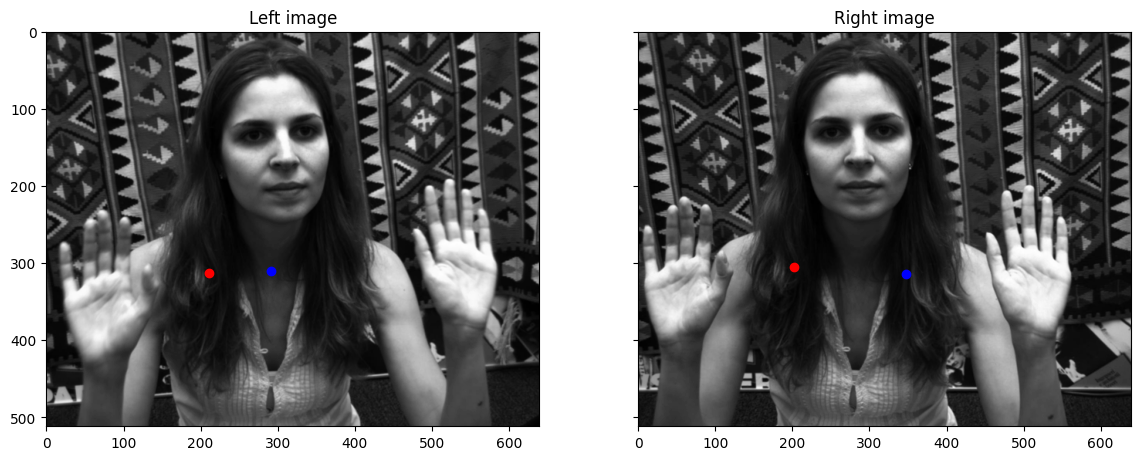

In [23]:
imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b')

**<span style="color:blue"> Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other does not. Please give a short explanation of what may have caused it.

**<span style="color:blue">Your answer:**\
   ...
    
    
    

The pair of red points look as explected but the pair of blue point is slitly different this is due to the Z axis.
In the right image the real point is hidden behind the woman so it looks like two different points.

## <span style="color:blue"> Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.\
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**<span style="color:blue">Answer Question:**
Can you double check if they are correct using F? If so, check it.


**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [24]:
eL = proj(ML, CR)
eR = proj(MR, CL)
eR_x, eR_y = eR
eR_Matrix = np.array([[0, -1, eR_y],
                    [1, 0, -eR_x],
                    [-eR_y , eR_x, 0]])


F = np.dot(np.dot(eR_Matrix,MR),np.linalg.pinv(ML))
F = F/F[2,2]

In [25]:
print(f"eL: {eL}")
print(f"\neR: {eR}")
print(f"\neR in Matrix form:\n {eR_Matrix}")
print(f"\nF Normalized:\n {F}")

eL: [19334.33412498  1092.93057043]

eR: [-13907.99596273  -1240.26006697]

eR in Matrix form:
 [[ 0.00000000e+00 -1.00000000e+00 -1.24026007e+03]
 [ 1.00000000e+00  0.00000000e+00  1.39079960e+04]
 [ 1.24026007e+03 -1.39079960e+04  0.00000000e+00]]

F Normalized:
 [[ 7.52252983e-07 -6.19603374e-06 -7.77247583e-03]
 [-4.58910493e-06  6.97408358e-07  8.79650690e-02]
 [ 4.77064786e-03 -8.53094445e-02  1.00000000e+00]]


In [26]:
check = np.round(np.dot(F, np.append(eL, 1)),10)

epsilon = 0.00000001
if check[0]<epsilon and check[1]<epsilon and check[2]<epsilon:
    print('yay')
else:
    print('NA')

yay


## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

Please click on three points in the right image.
clicked [(283.93133640553003, 162.76016589861752), (452.6317972350231, 260.08735483870964), (282.6336405529954, 441.7647741935483)]


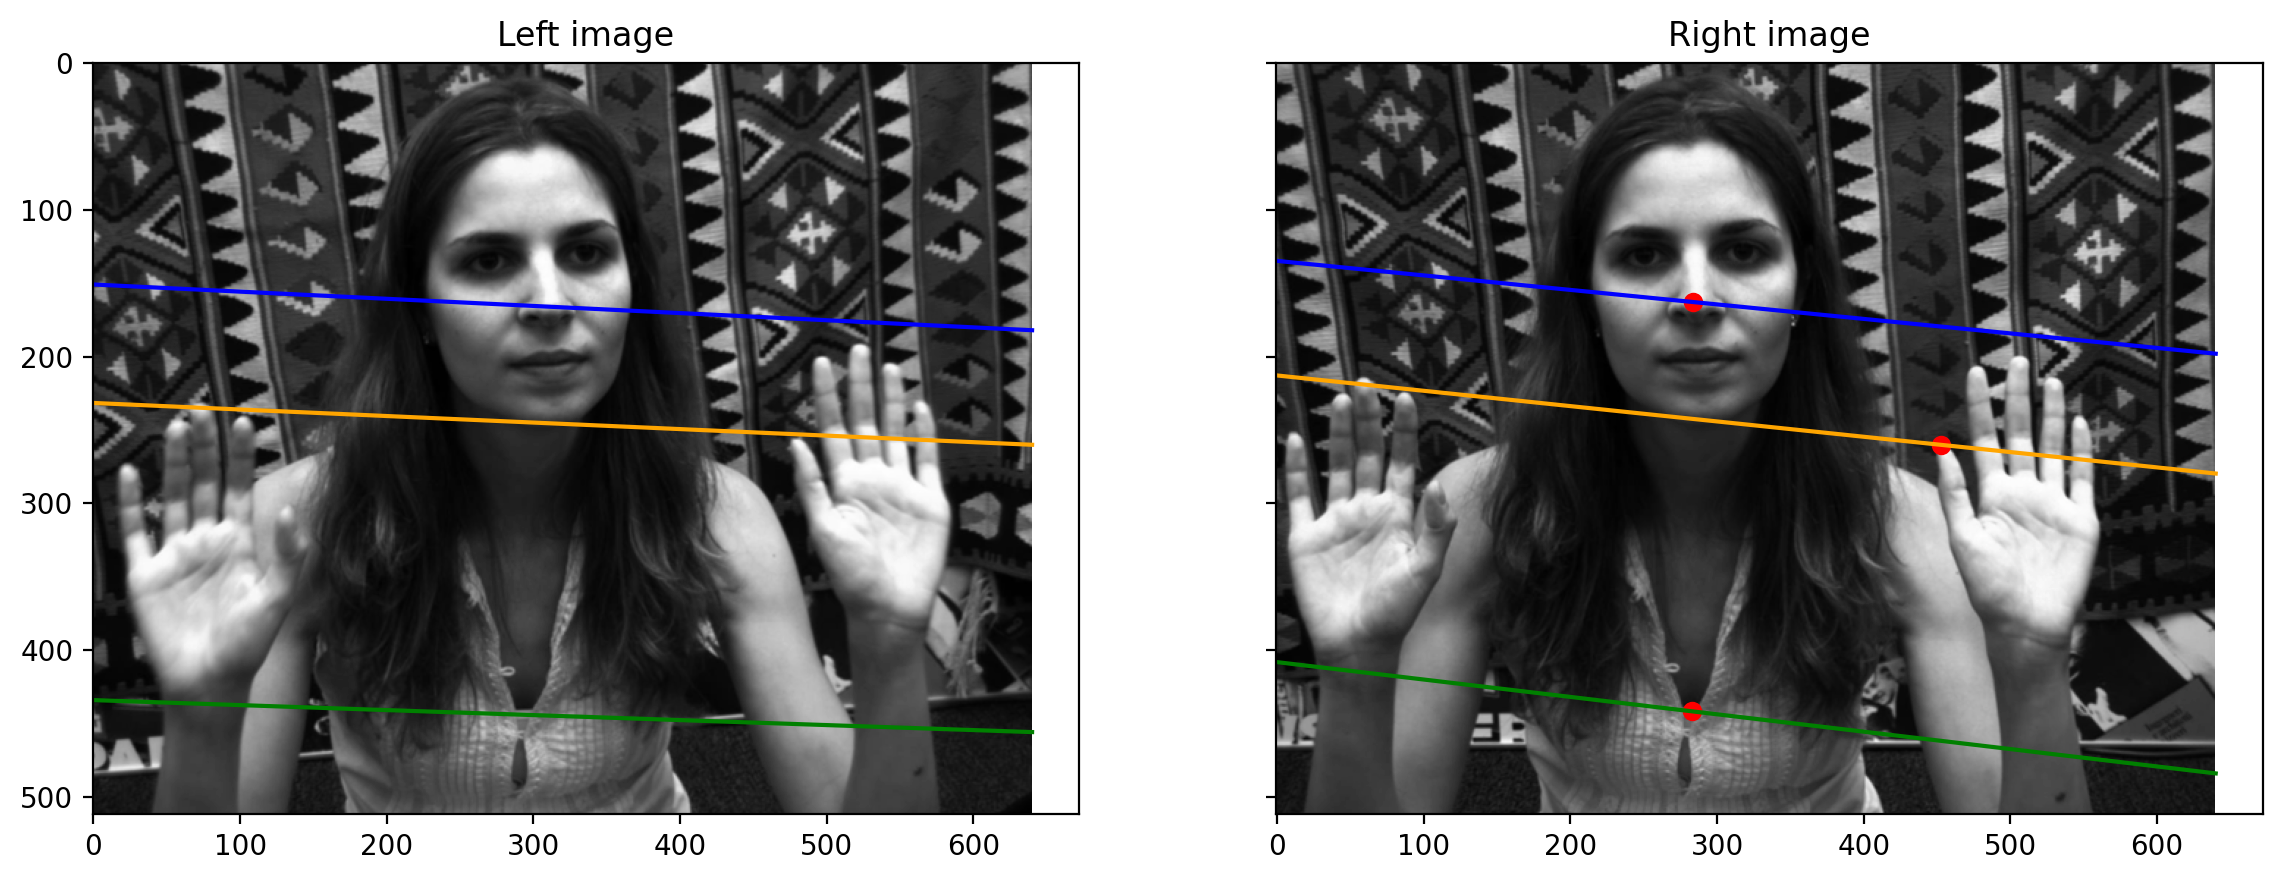

In [27]:
%matplotlib qt

# Read the images
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Set the figure size
plt.rcParams['figure.figsize'] = (14.0, 14.0)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

# Show the images
ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

# Use plt.ginput() to select points on the right image
print("Please click on three points in the right image.")
data = plt.ginput(3)
print("clicked", data)
# Scatter plot the selected points on the right image
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
ax2.scatter(x_val, y_val, color='r')

colors = ['blue', 'orange', 'green']
i=0
# Now, for each point selected on the right image, calculate its corresponding epipolar line on the left image
for x in data:
    # Homogenous coordinates of the selected point on the right image
    p_R= np.array([x[0], x[1], 1])

    # Compute the corresponding epipolar line on the left image
    l_L = np.dot(p_R.T, F)

    # Coefficients of the line ax + by + c = 0
    a, b, c = l_L

    # Calculate the y coordinates of the epipolar line at x=0 and x=image width
    x0, xWidth = 0, imL.shape[1]
    yx0 = -(a*x0 + c) / b
    yxWidth = -(a*xWidth + c) / b

    # Plot the epipolar line on the left image
    ax1.plot((x0, xWidth), (yx0, yxWidth), color = colors[i])

    #find a point in l_L
    p_L =  np.array([x0, yx0, 1])

    l_R = np.dot(F, p_L)

    a2, b2, c2 = l_R

    x0_2, xWidth_2 = 0, imR.shape[1]
    yx0_2 = -(a2*x0_2 + c2) / b2
    yxWidth_2 = -(a2*xWidth_2 + c2) / b2

    ax2.plot((x0_2, xWidth_2), (yx0_2, yxWidth_2), color = colors[i])
    i=i+1

%matplotlib inline
plt.show()

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

##  <span style="color:blue">Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


[ WARN:0@48.912] DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


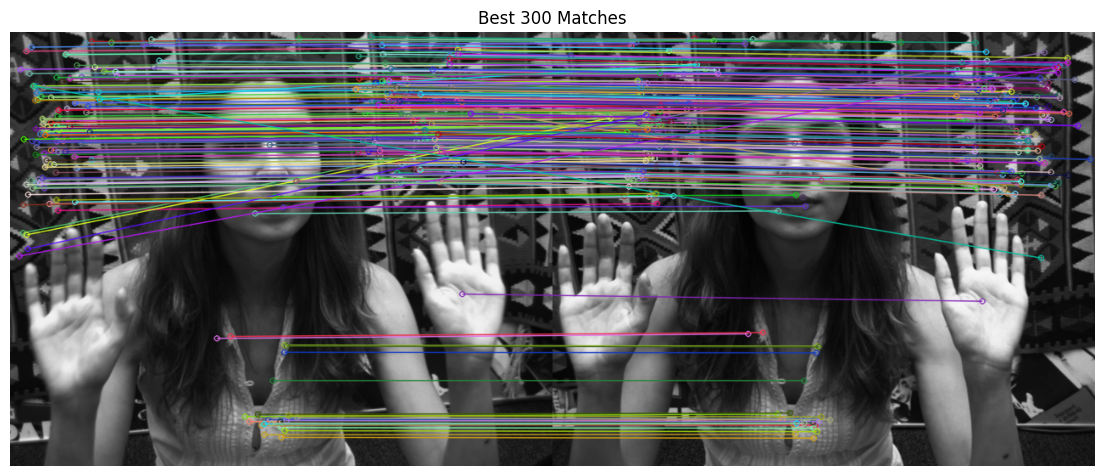

In [28]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []

# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray')
ax1.set_title('Best 300 Matches')
plt.axis('off')
plt.show()

<span style="color:blue"> Not for submission:

    Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Try the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

**a. Do you think all matches are correct?** <br>
It is unlikely that all matches are correct, as feature matching algorithms like SIFT can produce false positives. In the image, while many matches appear to be consistent (lines between keypoints that are closely aligned), some lines are crossing over each other in a manner that suggests they may not be correct matches. In particular, matches that span large distances or have significantly different angles compared to the majority might be incorrect.

**b. In which regions of the scene, most of the reliable matches were found?**<br>
From the image that we have received above, it seems that most of the reliable matches centered in the upper half of the image where there more cleare edges or corners of objects. This is typical for SIFT, as it is designed to detect and match keypoints based on features that are invariant to scaling, rotation, and partially invariant to change in illumination and 3D viewpoint. The facial features, clothing patterns, and object outlines in the scene seem to have a higher density of matches.

**c. Try the worst 200 matches as well -- matching[-200:]**<br>
To visualize the worst 200 matches, we need to modify the code to select the last 200 matches after sorting them by distance, where a higher distance likely indicates a worse match:

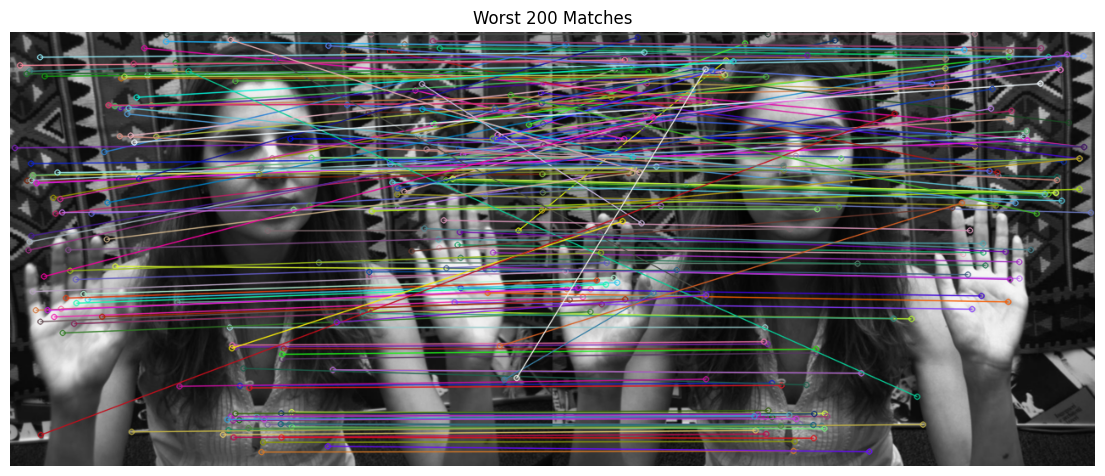

In [29]:
# Sort them in the order of their distance - worst matches will have the highest distance
matching = sorted(matching, key=lambda x: x.distance)

# Draw the worst 200 matches.
num_worst_matches_to_draw = min(200, len(matching))
img_worst_matches = cv2.drawMatches(imL, kp1, imR, kp2, matching[-num_worst_matches_to_draw:], None, flags=2)

# Displaying the worst matches
plt.figure(figsize=(14, 14))
plt.imshow(img_worst_matches, cmap='gray')
plt.title('Worst 200 Matches')
plt.axis('off')  
plt.show()

**Now, we will use the found matches to compute F using cv2.findFundamentalMat().**

In [30]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [31]:
np.set_printoptions(formatter={'float' : '{:0.7f}'.format})

print(f"F_calc Matrix:\n {F_calc}")
print(f"\nF Matrix:\n {F}")

F_calc Matrix:
 [[0.0000014 0.0000161 -0.0084220]
 [-0.0000217 0.0000038 0.0569918]
 [0.0060675 -0.0578870 1.0000000]]

F Matrix:
 [[0.0000008 -0.0000062 -0.0077725]
 [-0.0000046 0.0000007 0.0879651]
 [0.0047706 -0.0853094 1.0000000]]


And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

Hint: You can use scipy.linalg import null_space 

In [32]:
from scipy.linalg import null_space
e1=null_space(F_calc)
e2=null_space(F)

e1_c = e1[0:2,0]/e1[2,0]
e2_c = e2[0:2,0]/e2[2,0]

print(np.linalg.norm(e1_c-e2_c))

16678.425662757352


Please click on three points in the right image.
clicked [(285.22903225806465, 159.496460829493), (451.3341013824885, 264.60982488479254), (272.25207373271894, 443.69185253456214)]


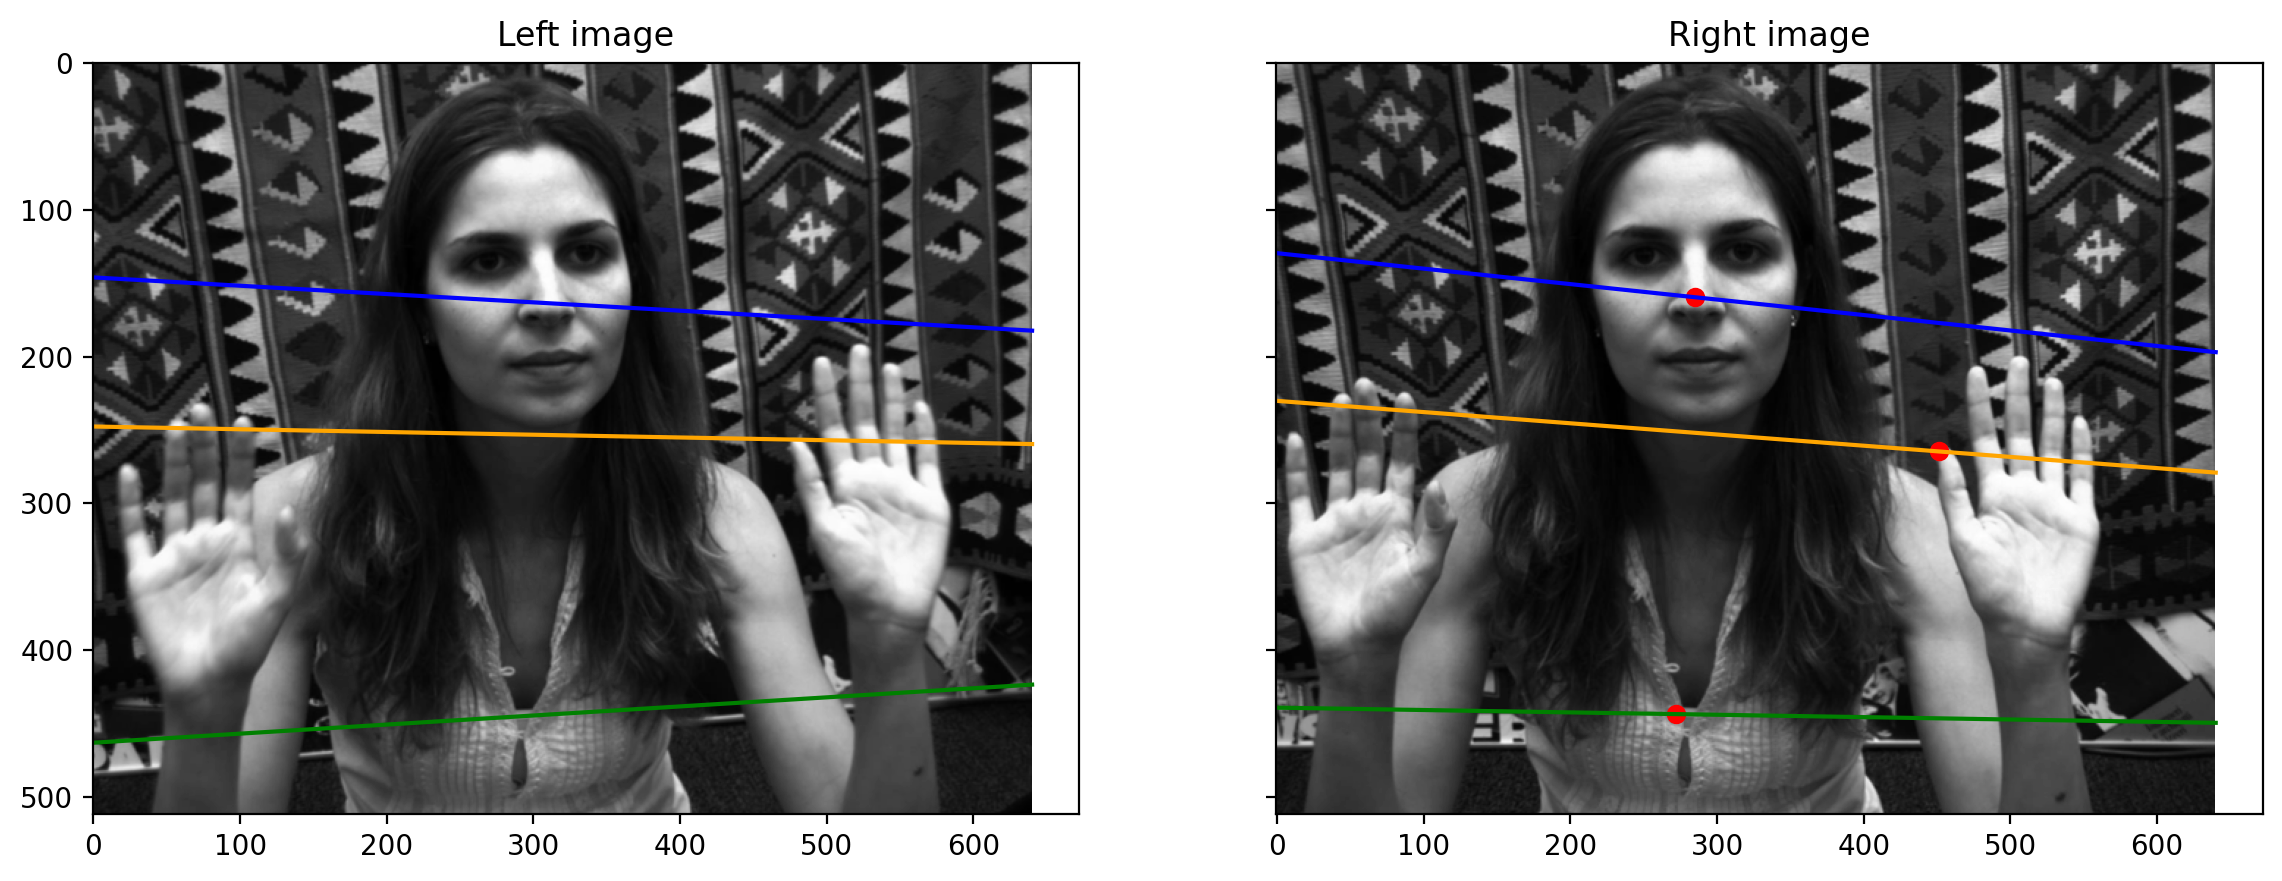

In [34]:
#Use it to draw the epipolar line as in the example above (change F to F_calc.T)
%matplotlib qt

# Read the images
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Set the figure size
plt.rcParams['figure.figsize'] = (14.0, 14.0)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

# Show the images
ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

# Use plt.ginput() to select points on the right image
print("Please click on three points in the right image.")
data = plt.ginput(3)
print("clicked", data)

# Scatter plot the selected points on the right image
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
ax2.scatter(x_val, y_val, color='r')

colors = ['blue', 'orange', 'green']
i=0
# Now, for each point selected on the right image, calculate its corresponding epipolar line on the left image
for x in data:
    # Homogenous coordinates of the selected point on the right image
    p_R= np.array([x[0], x[1], 1])

    # Compute the corresponding epipolar line on the left image
    l_L = np.dot(p_R.T, F_calc)

    # Coefficients of the line ax + by + c = 0
    a, b, c = l_L

    # Calculate the y coordinates of the epipolar line at x=0 and x=image width
    x0, xWidth = 0, imL.shape[1]
    yx0 = -(a*x0 + c) / b
    yxWidth = -(a*xWidth + c) / b

    # Plot the epipolar line on the left image
    ax1.plot((x0, xWidth), (yx0, yxWidth), color = colors[i])
    
    #find a point in l_L
    p_L =  np.array([x0, yx0, 1])
    
    l_R = np.dot(F_calc, p_L)

    a2, b2, c2 = l_R

    x0, xWidth = 0, imR.shape[1]
    yx0 = -(a2*x0 + c2) / b2
    yxWidth = -(a2*xWidth + c2) / b2

    ax2.plot((x0, xWidth), (yx0, yxWidth), color = colors[i])
    i=i+1

%matplotlib inline
plt.show()

In [35]:
#Compute the distance between the computed epipoles by F and by F_calc in each of the images.
eL_calc = (null_space(F_calc) / null_space(F_calc)[2])[:-1]
np.sqrt(((eL_calc - eL.reshape(2,1))**2).sum())

16678.425662758582

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit: 5 corresponding epipolar lines overlayed on   your pair of images.

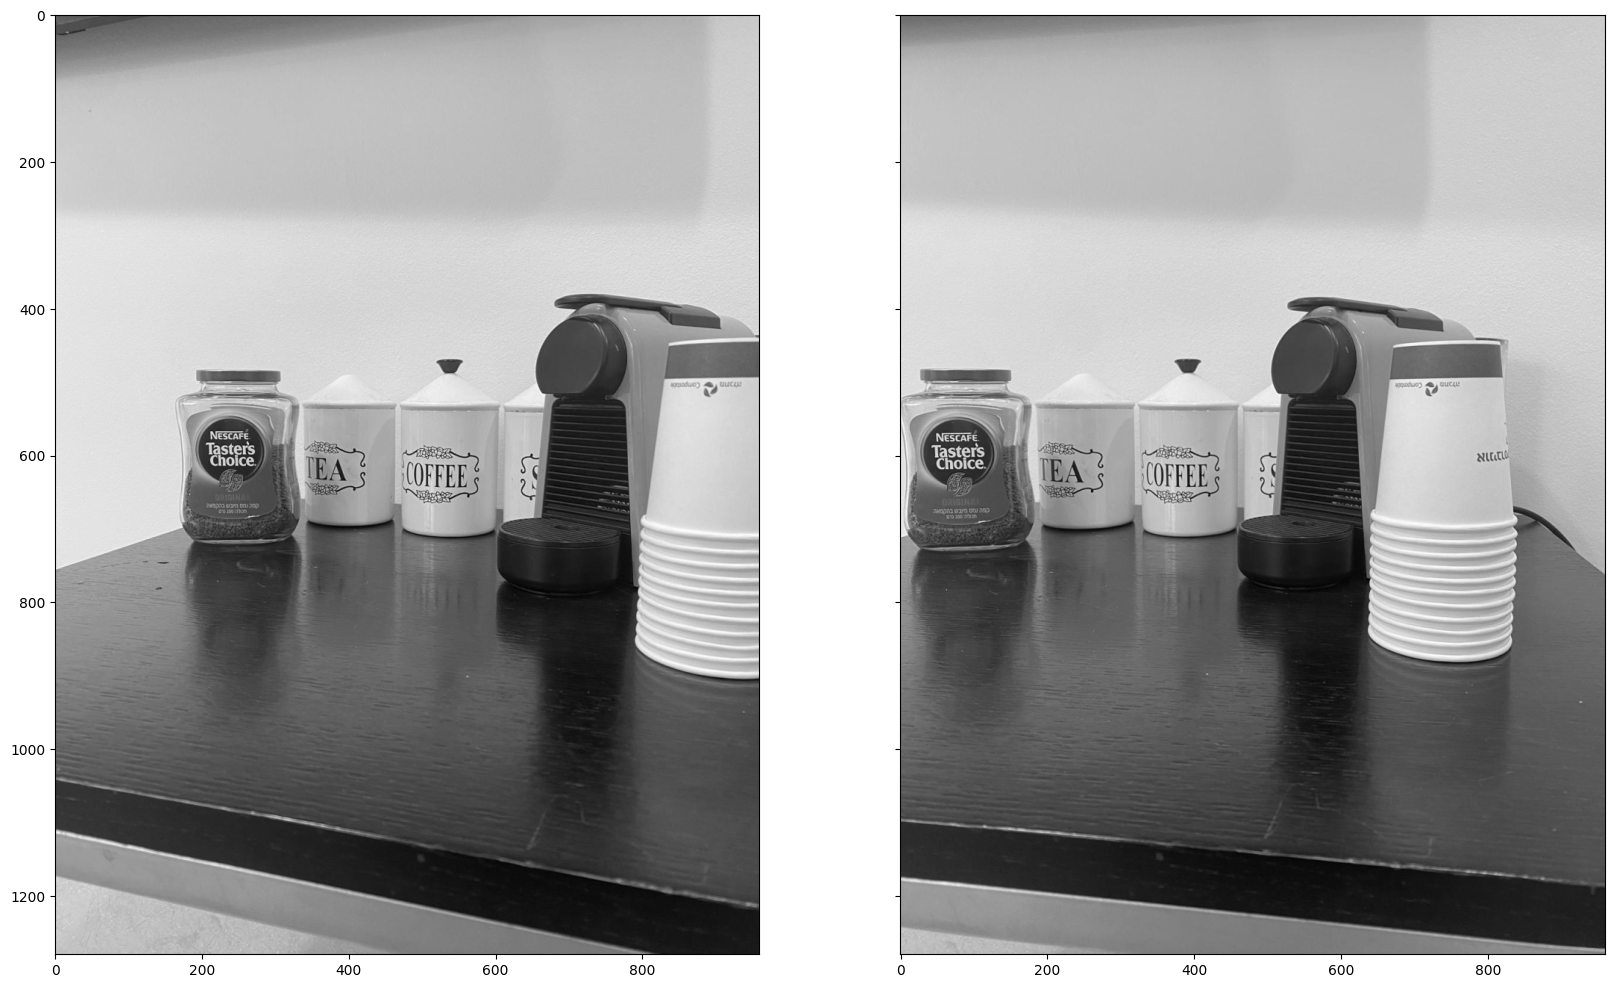

In [39]:
imL = cv2.imread('coffee1.jpeg', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('coffee2.jpeg', cv2.IMREAD_GRAYSCALE)

def resize(img, precent):
    scale_percent = precent # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

scale = 80

imL_re = resize(imL, scale)
imR_re = resize(imR, scale)

plt.rcParams['figure.figsize'] = (20.0, 20.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL_re, cmap='gray')
ax2.imshow(imR_re, cmap='gray')

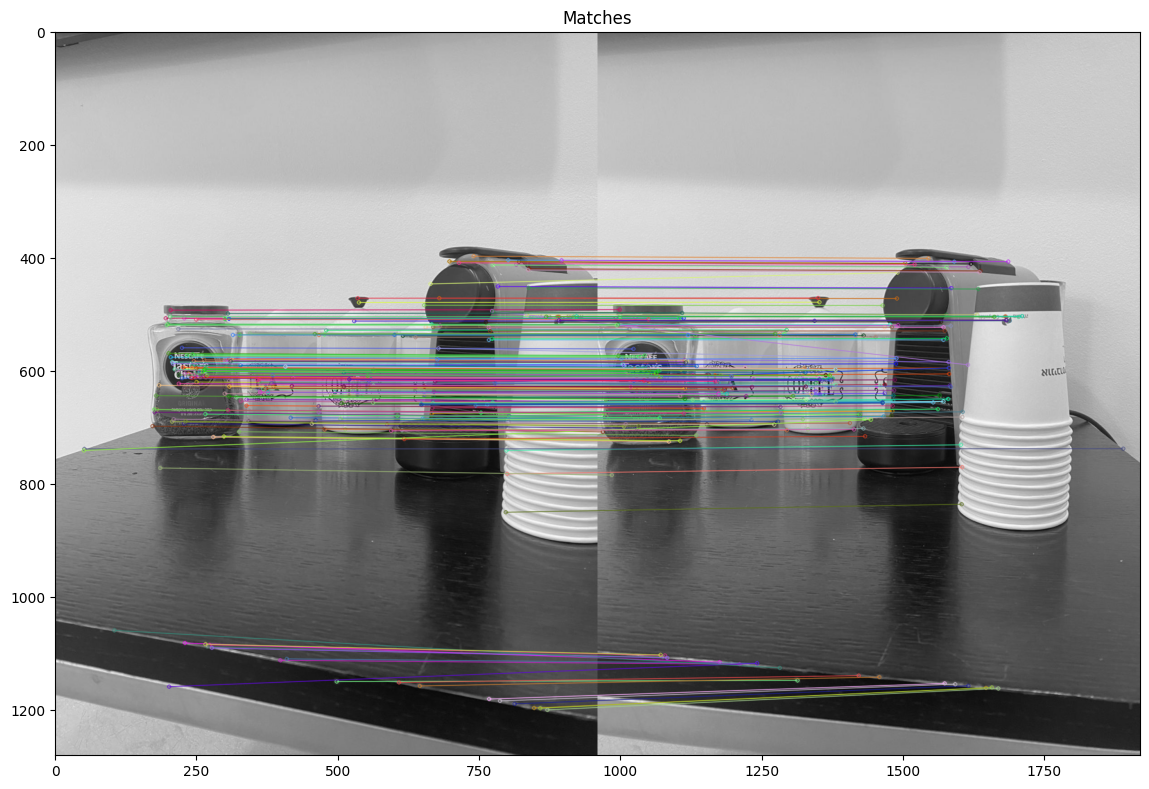

In [40]:
imL = imL_re
imR = imR_re


# Initiate SIFT detector
# In the link above you need to change the next line from 
# cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

Please click on five points in the right image.
clicked [(543.3849501343793, 391.0264634862626), (388.8460217261045, 474.5610193826276), (658.2449644918811, 606.1279449194024), (512.0594916732425, 720.9879592769041), (689.5704229530179, 869.2617959929519)]


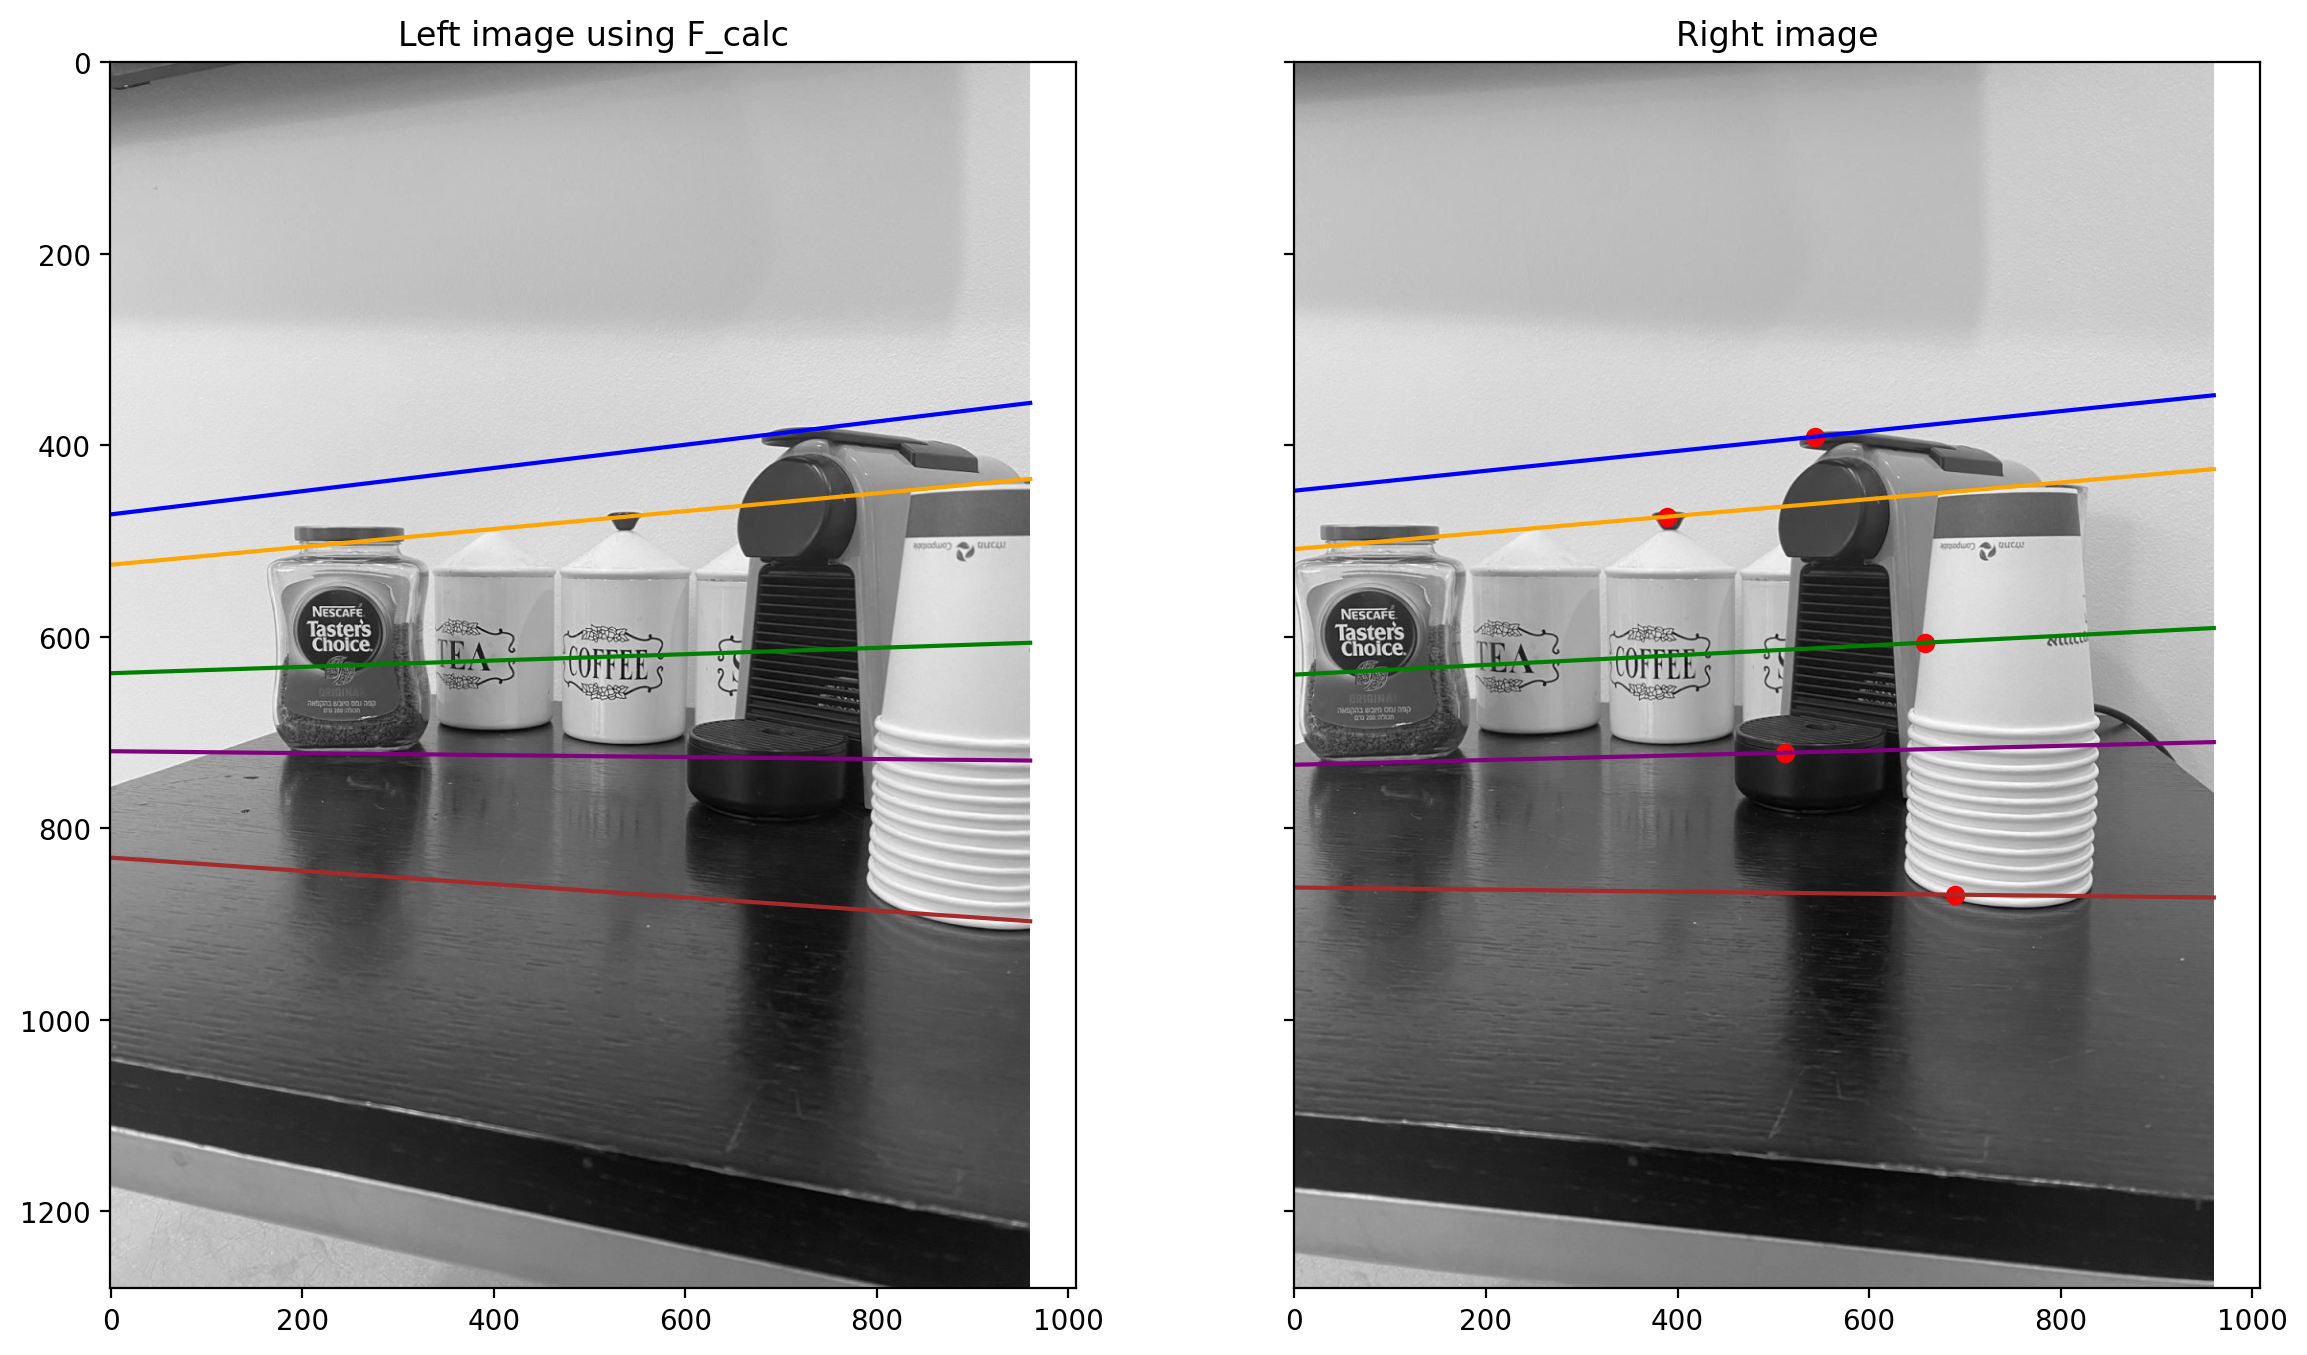

In [41]:
#Use it to draw the epipolar line as in the example above (change F to F_calc.T)
%matplotlib qt

imL = imL_re
imR = imR_re

# Set the figure size
plt.rcParams['figure.figsize'] = (14.0, 14.0)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

# Show the images
ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image using F_calc')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

# Use plt.ginput() to select points on the right image
print("Please click on five points in the right image.")
data = plt.ginput(5)
print("clicked", data)

# Scatter plot the selected points on the right image
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
ax2.scatter(x_val, y_val, color='r')

colors = ['blue', 'orange', 'green', 'purple', 'brown']
i=0

# Now, for each point selected on the right image, calculate its corresponding epipolar line on the left image
for x in data:
    # Homogenous coordinates of the selected point on the right image
    p_R= np.array([x[0], x[1], 1])

    # Compute the corresponding epipolar line on the left image
    l_L = np.dot(p_R.T, F_calc)

    # Coefficients of the line ax + by + c = 0
    a, b, c = l_L

    # Calculate the y coordinates of the epipolar line a
    # t x=0 and x=image width
    x0, xWidth = 0, imL.shape[1]
    yx0 = -(a*x0 + c) / b
    yxWidth = -(a*xWidth + c) / b

    # Plot the epipolar line on the left image
    ax1.plot((x0, xWidth), (yx0, yxWidth), color = colors[i])

    #find a point in l_L
    p_L =  np.array([x0, yx0, 1])

    l_R = np.dot(F_calc, p_L)

    a2, b2, c2 = l_R

    x0, xWidth = 0, imR.shape[1]
    yx0 = -(a2*x0 + c2) / b2
    yxWidth = -(a2*xWidth + c2) / b2

    ax2.plot((x0, xWidth), (yx0, yxWidth), color = colors[i])
    i=i+1

%matplotlib inline
plt.show()